# Principal Components Analysis

<img src="./sharif.png" alt="SUT logo" width=300 height=300 align=left class="saturate">

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 5<br>
<font color=696880 size=4>
    Amirhossein Alamdar

____

In [ ]:
student_number = 400171324
full_name = diana babaei
assert student_number and full_name is not None, 'pls input your information'

SyntaxError: invalid syntax (<ipython-input-1-3506a1889712>, line 2)

# Introduction

In this assignment, you will implement PCA and try to interpret it.

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from scipy.stats import boxcox


# Dataset Preparation (30)

Read the nutrition CSV file and display a few samples.

In [16]:
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/ML_resource/nutrition.csv")
df.head()

Mounted at /content/drive


,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


Display dataset information.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


Exclude the non-numeric features (you will need these features later in the notebook).

In [18]:
non_numeric = df.select_dtypes(exclude = ['number']).columns
numeric1 = df.drop(columns = ['ID'])
numeric = numeric1.drop(columns = non_numeric)
print(numeric.head())

   Energy_kcal  Protein_g  Fat_g  Carb_g  Sugar_g  Fiber_g  VitA_mcg  \
0        717.0       0.85  81.11    0.06     0.06      0.0     684.0   
1        717.0       0.85  81.11    0.06     0.06      0.0     684.0   
2        876.0       0.28  99.48    0.00     0.00      0.0     840.0   
3        353.0      21.40  28.74    2.34     0.50      0.0     198.0   
4        371.0      23.24  29.68    2.79     0.51      0.0     292.0   

   VitB6_mg  VitB12_mcg  VitC_mg  ...  Folate_USRDA  Niacin_USRDA  \
0     0.003        0.17      0.0  ...        0.0075      0.002625   
1     0.003        0.13      0.0  ...        0.0075      0.002625   
2     0.001        0.01      0.0  ...        0.0000      0.000188   
3     0.166        1.22      0.0  ...        0.0900      0.063500   
4     0.065        1.26      0.0  ...        0.0500      0.007375   

   Riboflavin_USRDA  Thiamin_USRDA  Calcium_USRDA  Copper_USRDA  \
0          0.026154       0.004167       0.020000      0.000000   
1          0.02615

First of all, plot the correlation matrix and identify redundant features. Note to use numerical features for this.

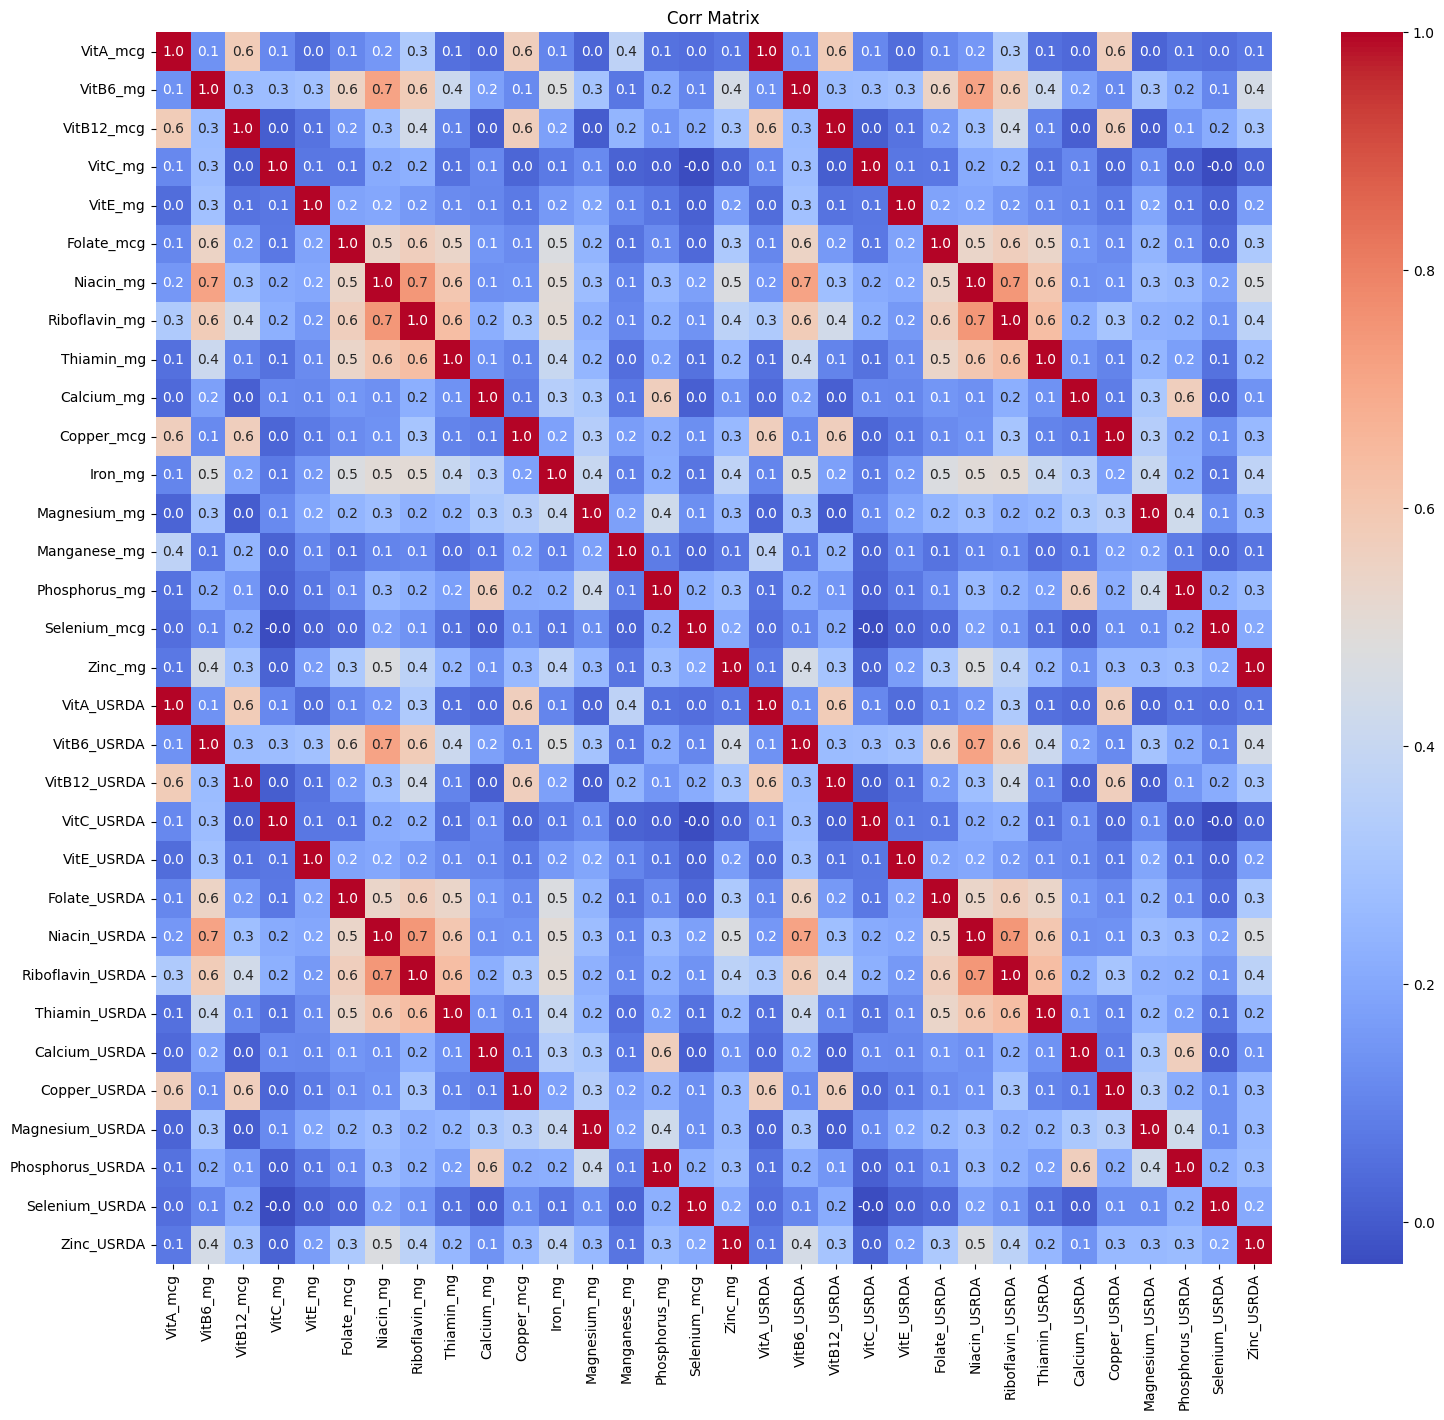

In [19]:
numeric_cor = numeric.drop( columns = ['Energy_kcal','Protein_g','Fat_g','Carb_g','Sugar_g','Fiber_g'])
corr_matrix = numeric_cor.corr()
plt.figure(figsize=(18, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Corr Matrix')
plt.show()


Identify redundant features and remove them from the dataframe. Plot the correlation matrix again.

Redundant features (correlation > 0.9): {'VitB12_USRDA', 'Folate_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA', 'Copper_USRDA', 'VitB6_USRDA', 'Magnesium_USRDA', 'Selenium_USRDA', 'Riboflavin_USRDA', 'Niacin_USRDA', 'VitE_USRDA', 'VitC_USRDA', 'VitA_USRDA', 'Zinc_USRDA', 'Phosphorus_USRDA'}


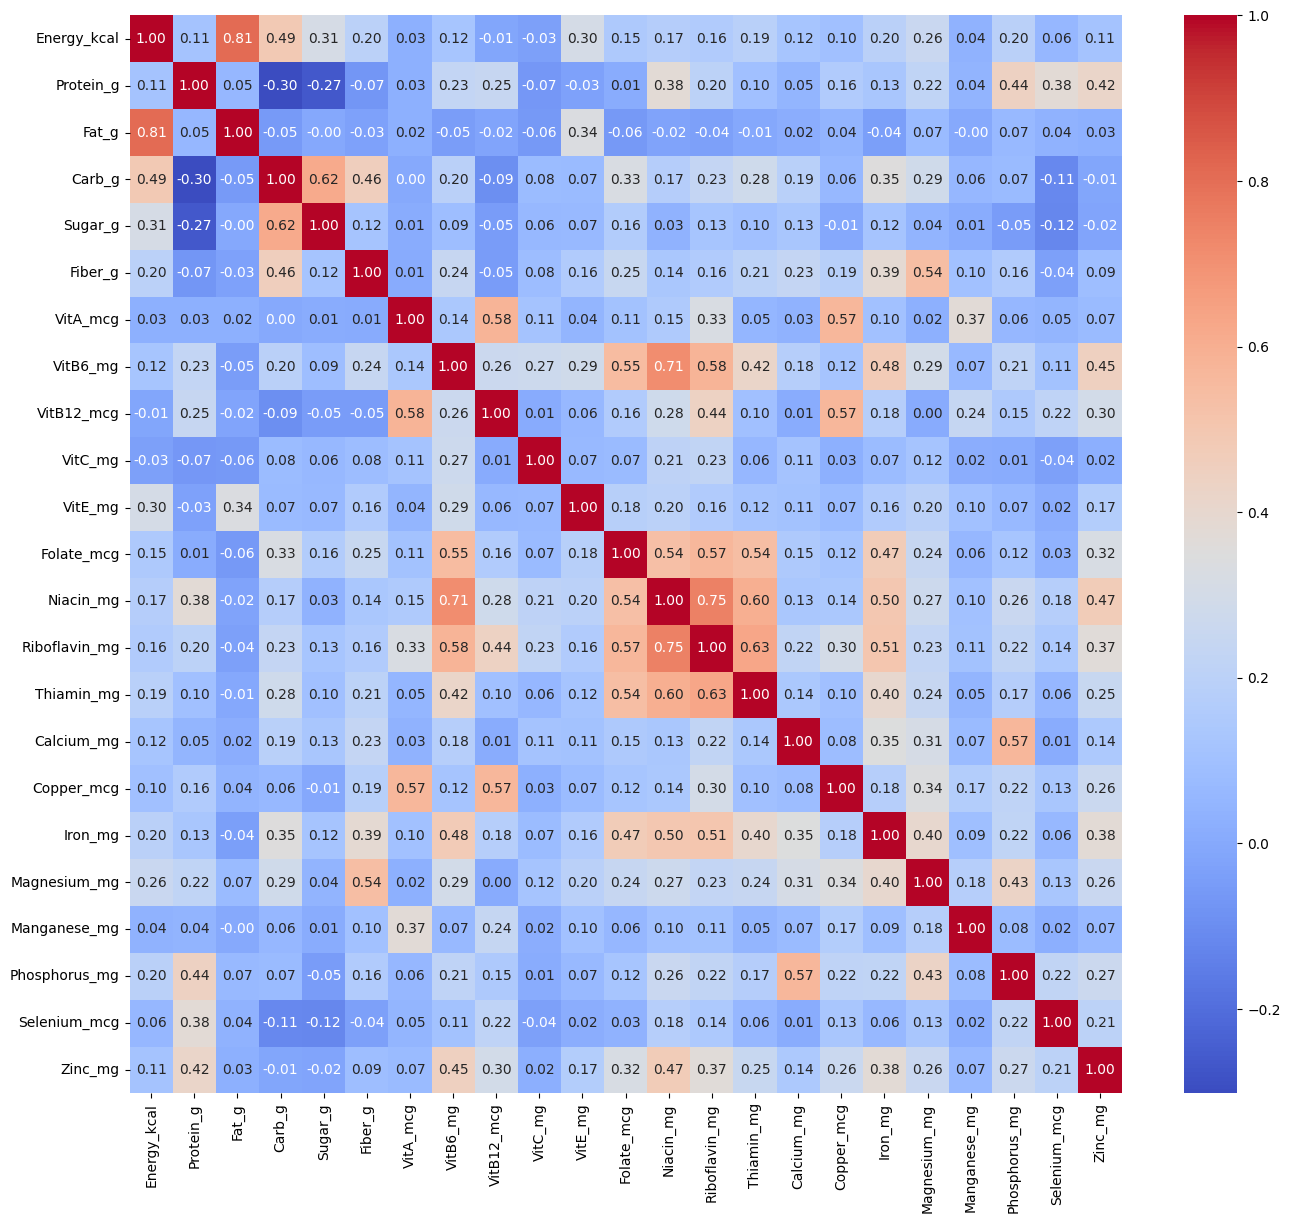

In [20]:
threshold = 0.9
redundant_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            redundant_features.add(colname)

print("Redundant features (correlation > 0.9):", redundant_features)

numeric_reduced = numeric.drop(columns=redundant_features)

new_corr_matrix = numeric_reduced.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(new_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


Explore the dataset by plotting the distribution of each feature separately.

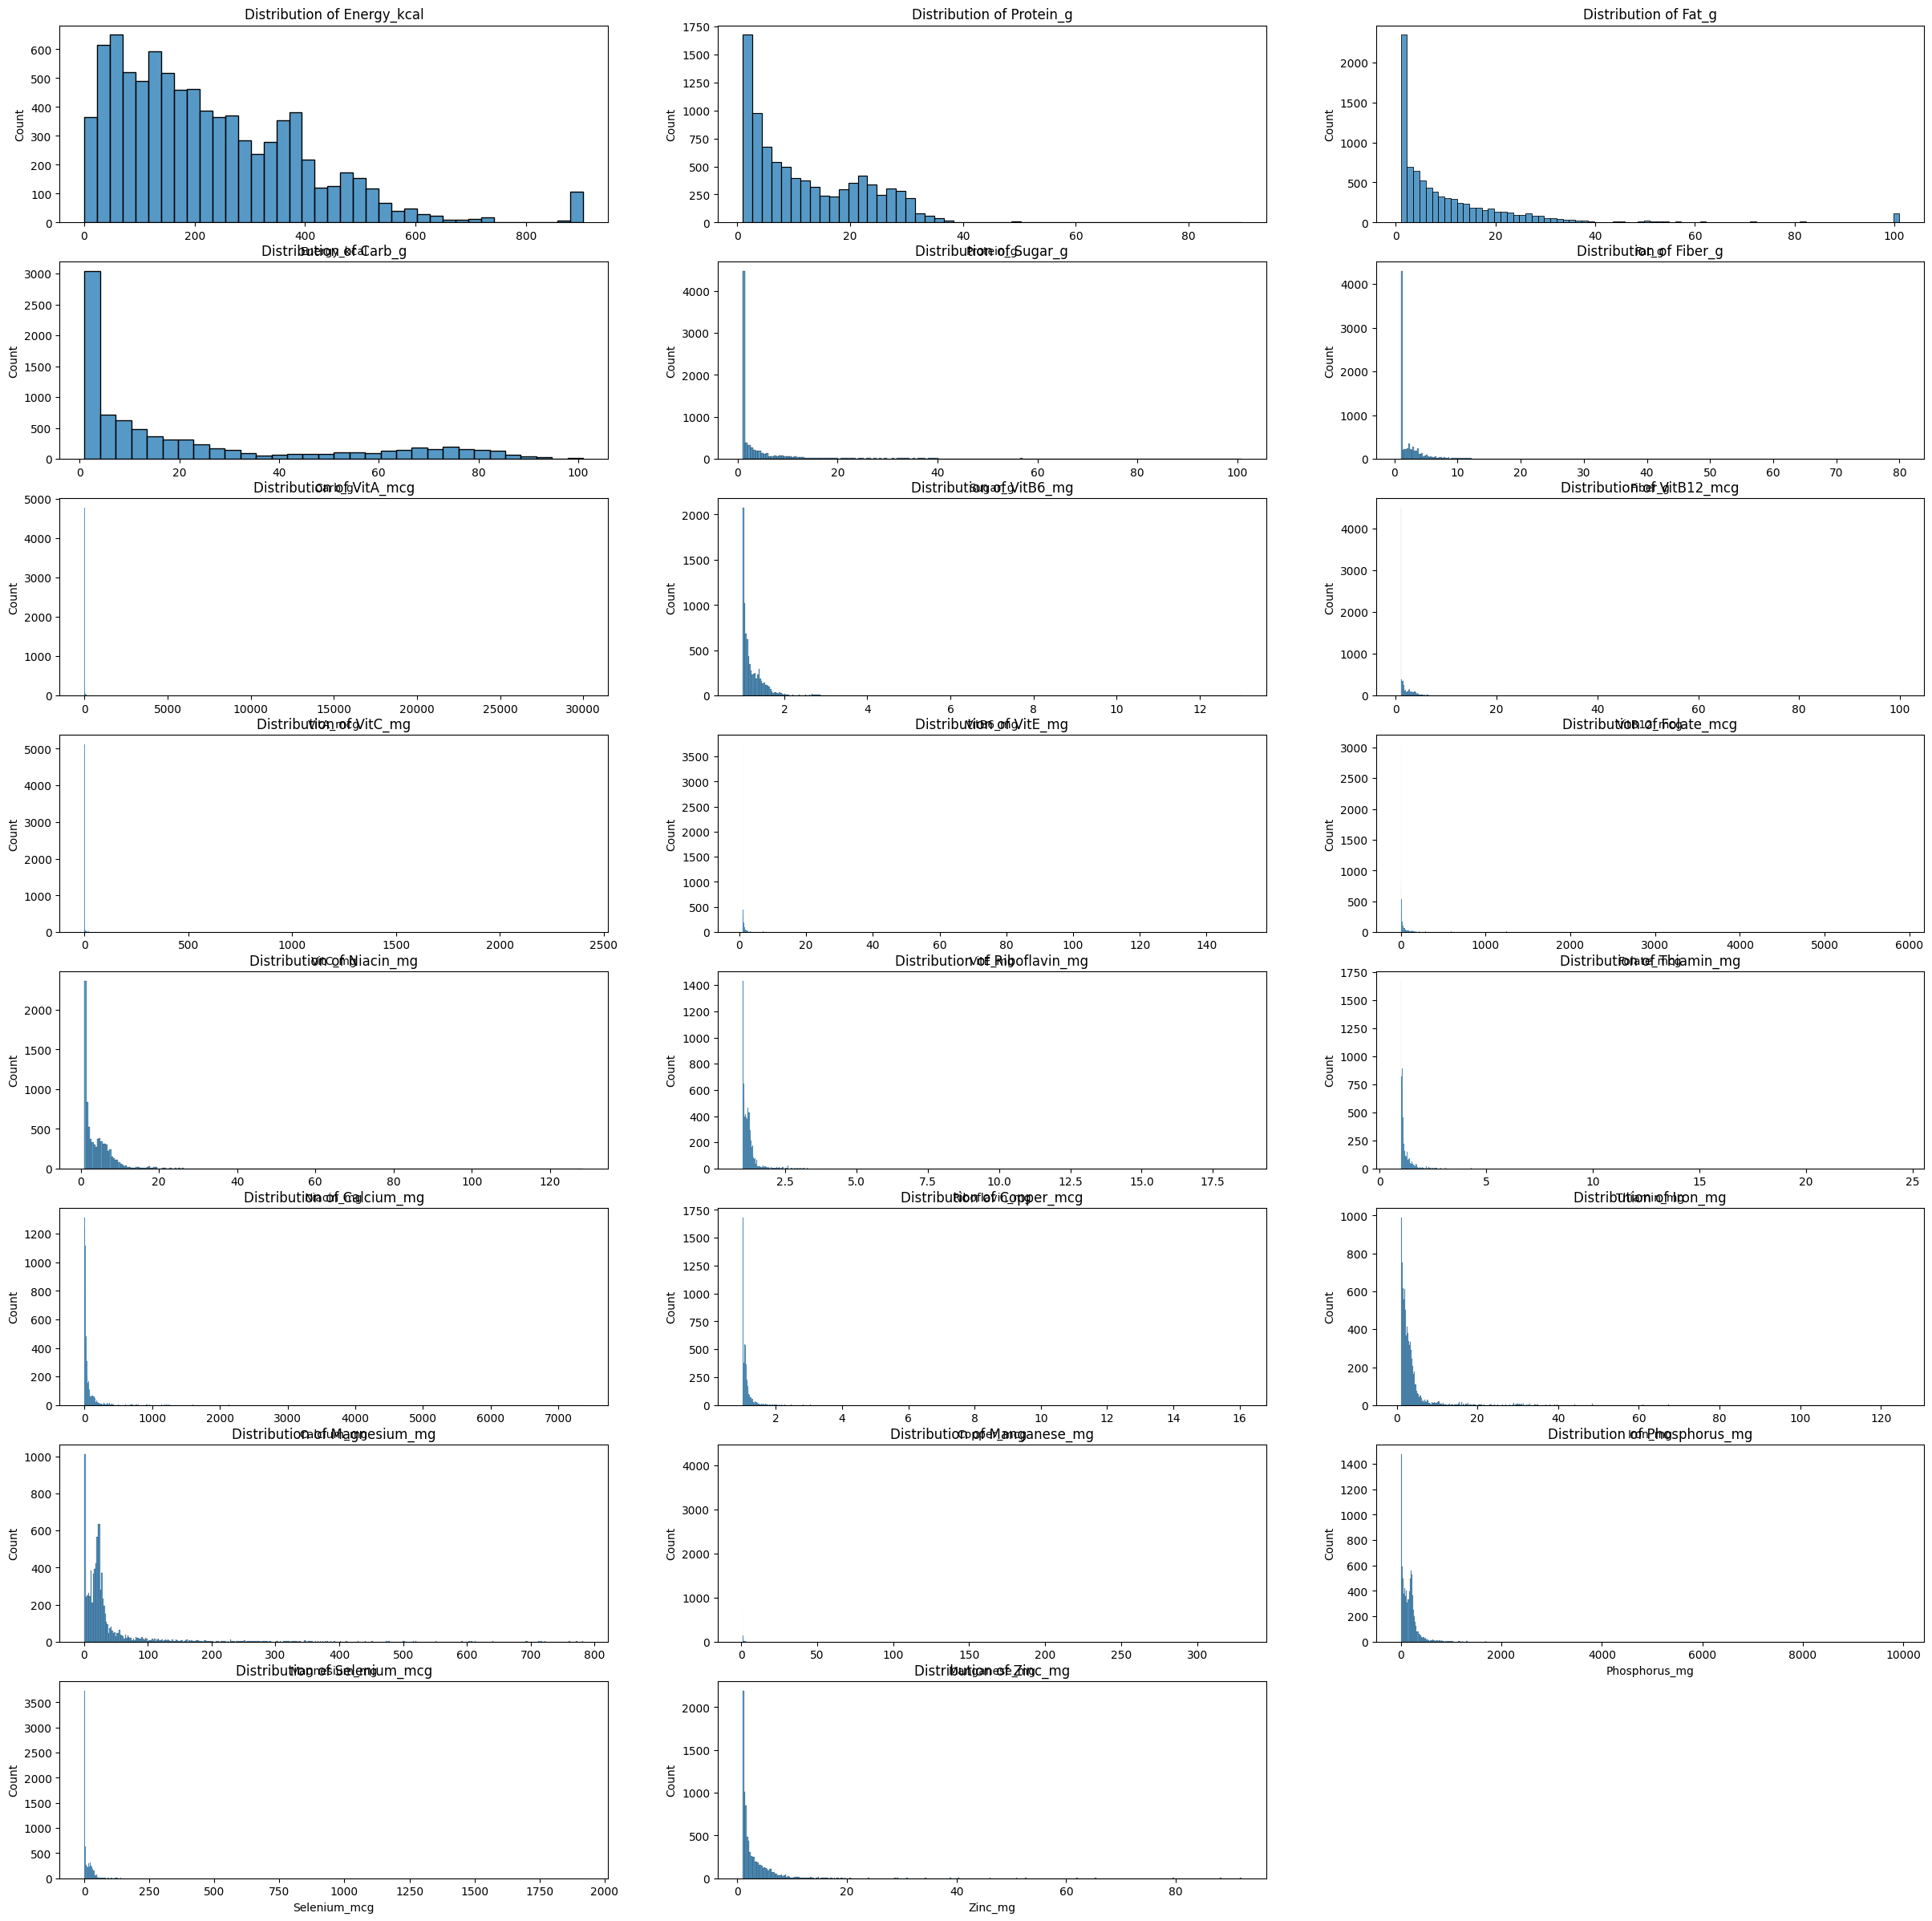

In [30]:
plt.figure(figsize=(30, 30))
for i, column in enumerate(numeric_reduced.columns, 1):
    plt.subplot(len(numeric_reduced.columns) // 3 + 1, 3, i)
    sns.histplot(numeric_reduced[column])
    plt.title(f'Distribution of {column}')

plt.show()

We can use the Box-Cox transformation to make the data more normally distributed. You can look it up for more information

In [22]:
#data should be positive
numeric_reduced = numeric_reduced + 1

boxcoxed_df = pd.DataFrame(index = numeric_reduced.index)

for column in numeric_reduced.columns:
    transformed_df, _ = boxcox(numeric_reduced[column])
    boxcoxed_df[f"{column}_boxcoxed"] = transformed_df

Now plot the feature distributions again and compare it with the previous plots. (No need to write down anything)

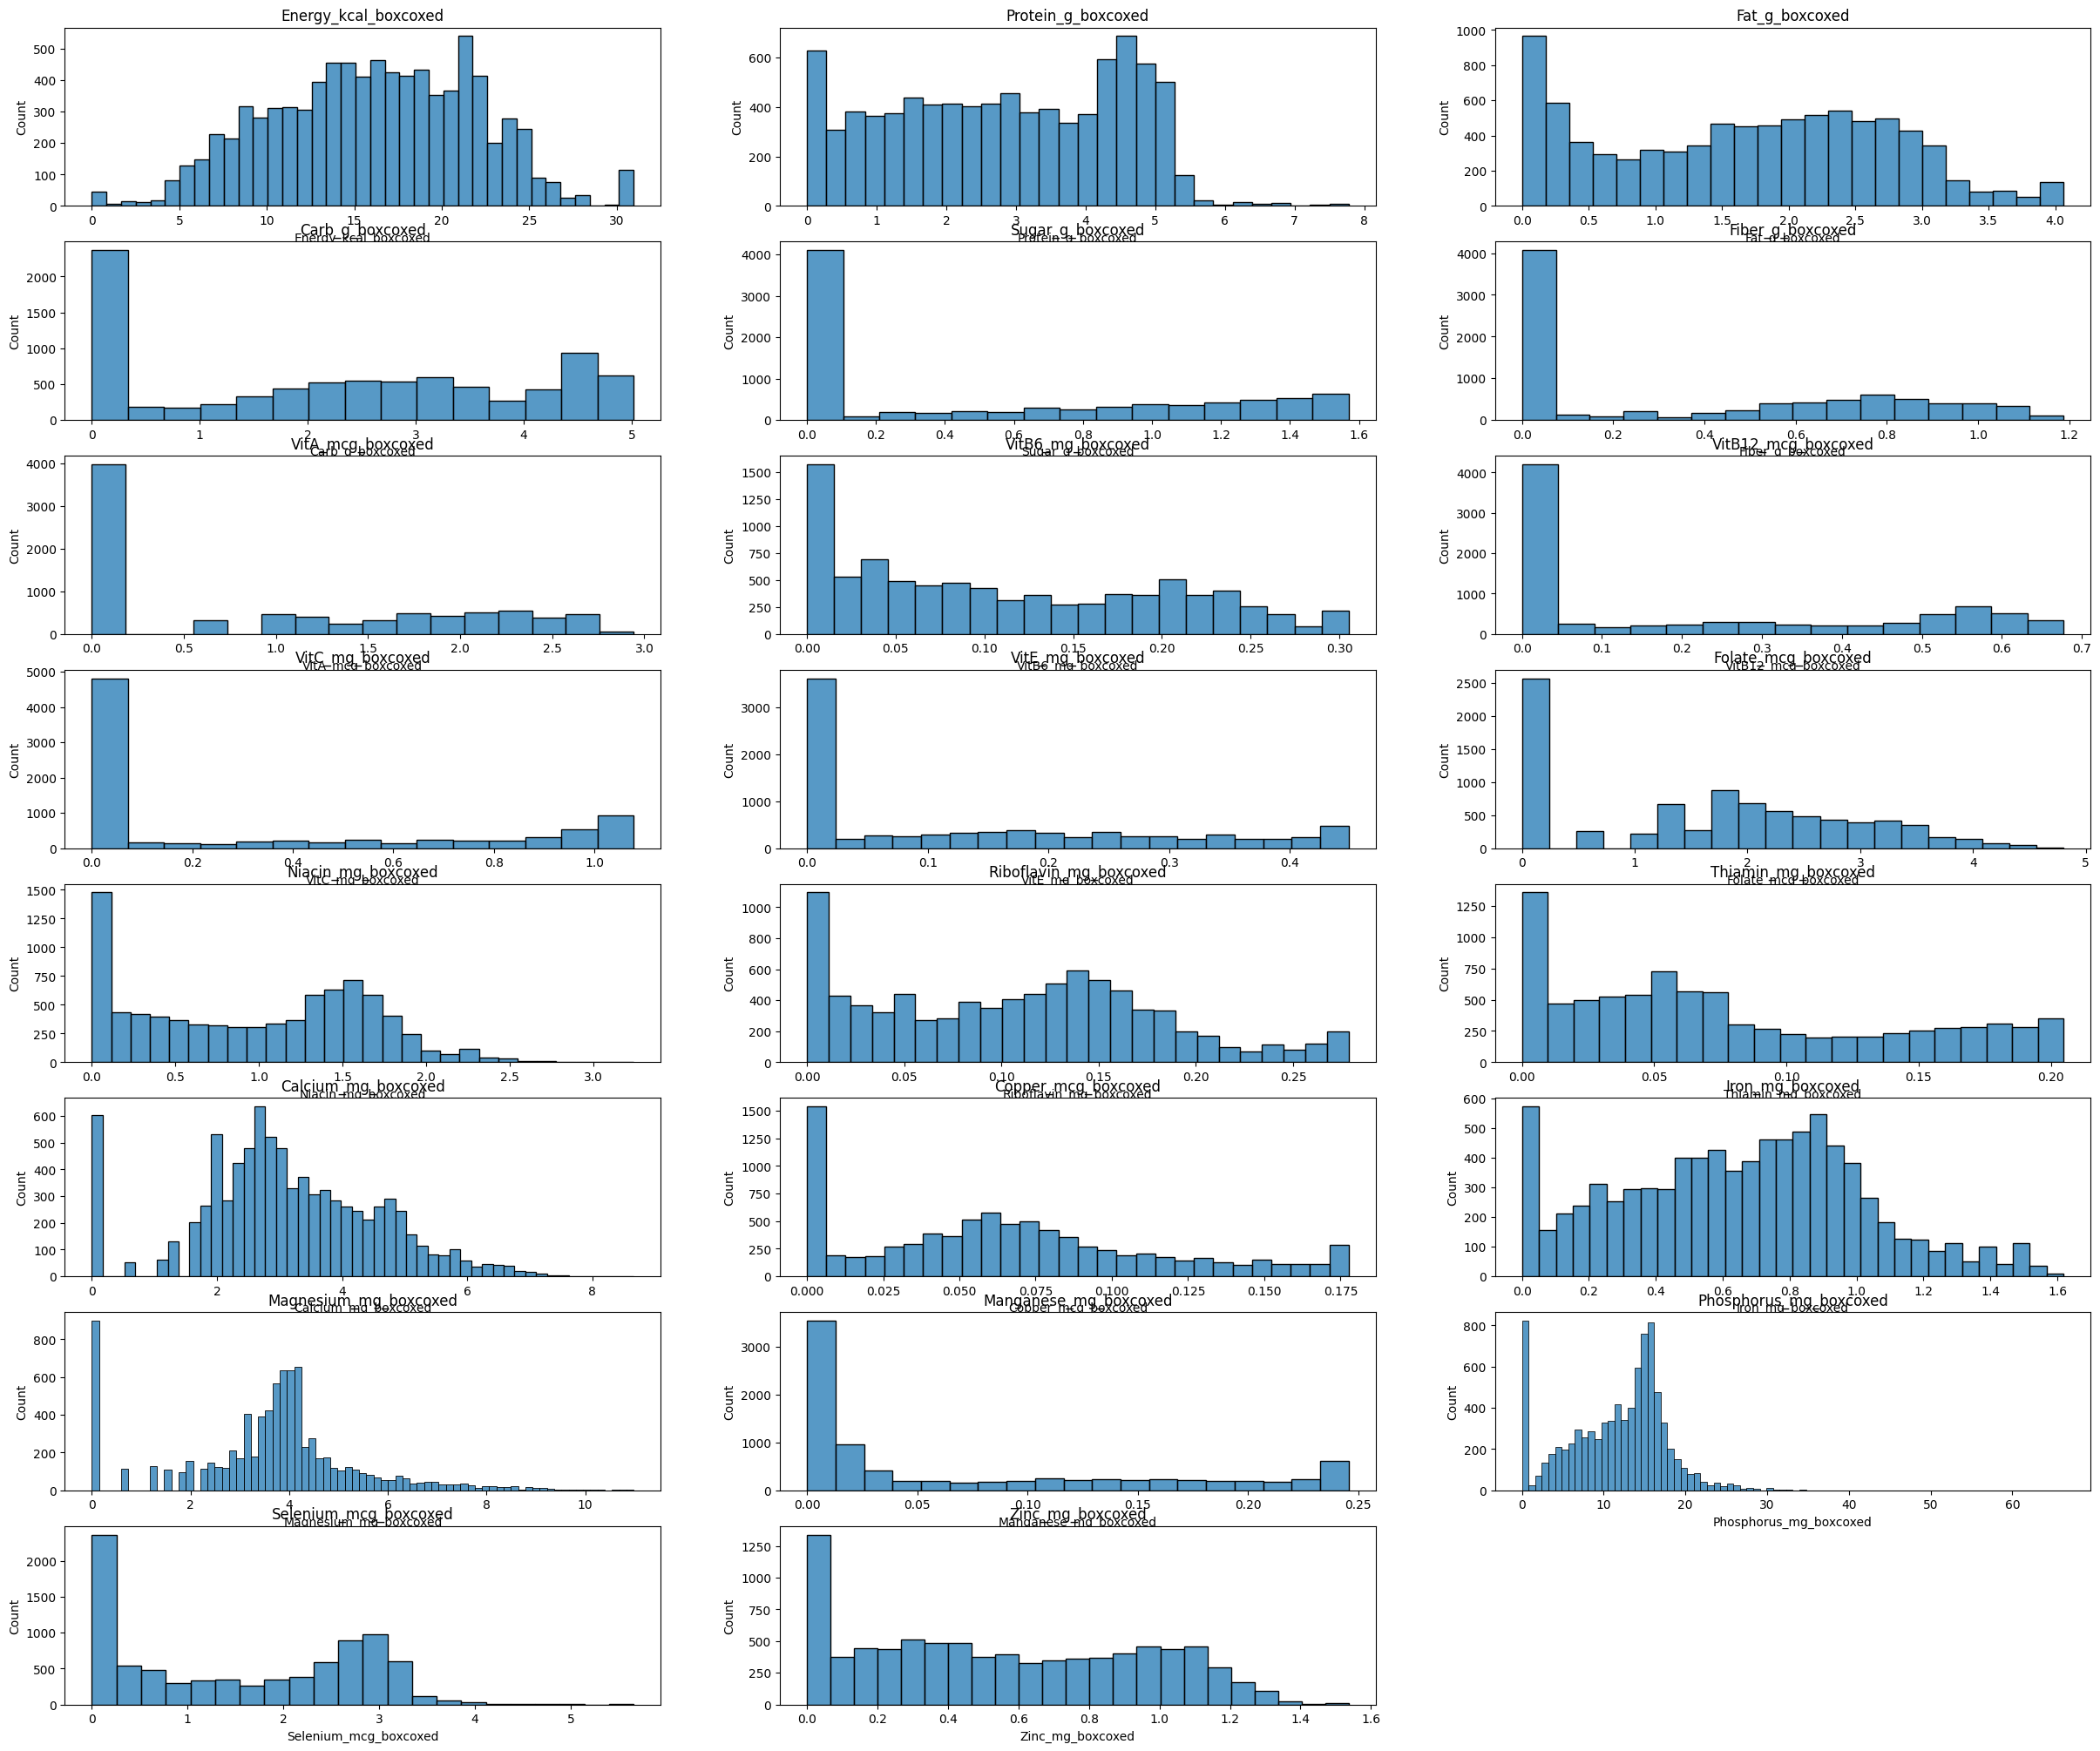

In [31]:
plt.figure(figsize=(30, 25))
for i, column in enumerate(boxcoxed_df.columns, 1):
    plt.subplot(len(boxcoxed_df.columns) // 3 + 1, 3, i)
    sns.histplot(boxcoxed_df[column])
    plt.title(column)
plt.show()


Finally, Standardize the data to mean 0 and variance 1. You can use standard scaler.

In [32]:
scaler = StandardScaler()
standard_df = scaler.fit_transform(boxcoxed_df)

mean = np.mean(standard_df)
var = np.var(standard_df)

print(f"Mean of data: {mean:.0f}")
print(f"Variance of data: {var : .0f}")


Mean of data: 0
Variance of data:  1


# Model Implementation (40)

Implement PCA from scratch. Remember to calculate and save components and explained variance ratio for later sections.

In [33]:
class CustomPCA:
    def __init__(self, n_components = None):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance_ratio_ = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        cov_matrix = np.cov(X_centered, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        eigenvectors = eigenvectors[:, np.argsort(eigenvalues)[::-1]]
        eigenvalues = eigenvalues[np.argsort(eigenvalues)[::-1]]
        self.components = eigenvectors[:, :self.n_components]
        explained_variance = eigenvalues[:self.n_components]
        total_variance = np.sum(eigenvalues)
        self.explained_variance_ratio_ = explained_variance / total_variance

    def transform(self, X):
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

    def get_explained_variance_ratio(self):
        return self.explained_variance_ratio_

    def get_components(self):
        return self.components


Fit the model and obtain the PCA results. The number of components should be the same as the number of features.

In [34]:
pca = CustomPCA()
pca.fit(standard_df)
explained_variance_ratio = pca.get_explained_variance_ratio()
print("Explained Variance Ratio:", explained_variance_ratio)
pca_result = pca.transform(standard_df)
print("PCA Result Shape:", pca_result.shape)

Explained Variance Ratio: [0.34554936 0.17971019 0.09201387 0.06176452 0.05520037 0.03764111
 0.02996247 0.02566808 0.02294417 0.0192006  0.01828886 0.01721459
 0.01443828 0.01337614 0.0107629  0.00977106 0.00894584 0.00878398
 0.00760274 0.00668982 0.00589323 0.00545379 0.00312402]
PCA Result Shape: (8618, 23)


#### check the eigenvalues to find most important components
Plot the explained variance ratio based on the number of components.


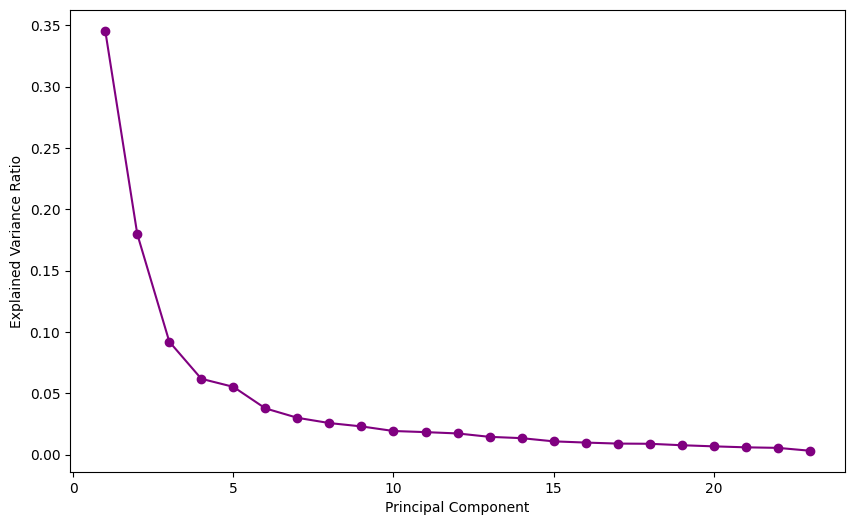

In [35]:
eigenvalues = pca.get_explained_variance_ratio()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-', color='purple')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()


therefore we are going to pick 5 components

In [36]:
pca = CustomPCA(n_components=5)
pca.fit(standard_df)

explained_variance_ratio = pca.get_explained_variance_ratio()
total_explained_variance_ratio = np.sum(explained_variance_ratio)

print(f'Total explained variance ratio for the first 5 components: {total_explained_variance_ratio:.4f}')

Total explained variance ratio for the first 5 components: 0.7342


Build a new DataFrame with the first 5 components as features and include the FoodGroup column from the first section.

In [37]:
pca_components = pca.transform(standard_df)

metadata = df[['FoodGroup', 'ShortDescrip', 'Descrip']]

new_df = pd.DataFrame(data=pca_components[:, :5], columns=['c1', 'c2', 'c3', 'c4', 'c5'])
new_df[['FoodGroup', 'ShortDescrip', 'Descrip']] = metadata

signs = [-1, -1, 1, 1, 1]
for i in range(5):
    if np.sign(new_df.iloc[0, i]) != signs[i]:
        new_df.iloc[:, i] = -new_df.iloc[:, i]

new_df.index = df.index

print(new_df.head())


         c1        c2        c3        c4        c5               FoodGroup  \
0 -2.638414 -1.702512  1.283725  3.759546  2.413650  Dairy and Egg Products   
1 -2.537931 -1.550464  1.279816  3.634065  2.492683  Dairy and Egg Products   
2 -3.751335 -2.080190  2.067932  3.668154  2.457203  Dairy and Egg Products   
3  2.000578 -1.361858 -0.395834  2.432792  0.887796  Dairy and Egg Products   
4  1.582713 -1.321484 -0.238444  2.597599  1.286317  Dairy and Egg Products   

               ShortDescrip                     Descrip  
0          BUTTER,WITH SALT              Butter, salted  
1  BUTTER,WHIPPED,WITH SALT  Butter, whipped, with salt  
2      BUTTER OIL,ANHYDROUS       Butter oil, anhydrous  
3               CHEESE,BLUE                Cheese, blue  
4              CHEESE,BRICK               Cheese, brick  


We expect these new features to be orthogonal to each other. Check this and show the correlation between the features.

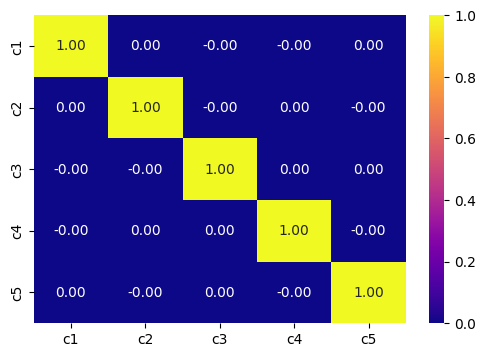

In [38]:
correlation_matrix = np.corrcoef(pca_components[:, :5], rowvar=False)
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt='.2f',
            xticklabels=['c1', 'c2', 'c3', 'c4', 'c5'],
            yticklabels=['c1', 'c2', 'c3', 'c4', 'c5'])
plt.show()


# Result Analysis (30)

### 1- Eigenvectors (10):

In this part, you are required to plot the contribution of nutrients to our new axes or components. Essentially, plot the eigenvectors calculated in our PCA model.

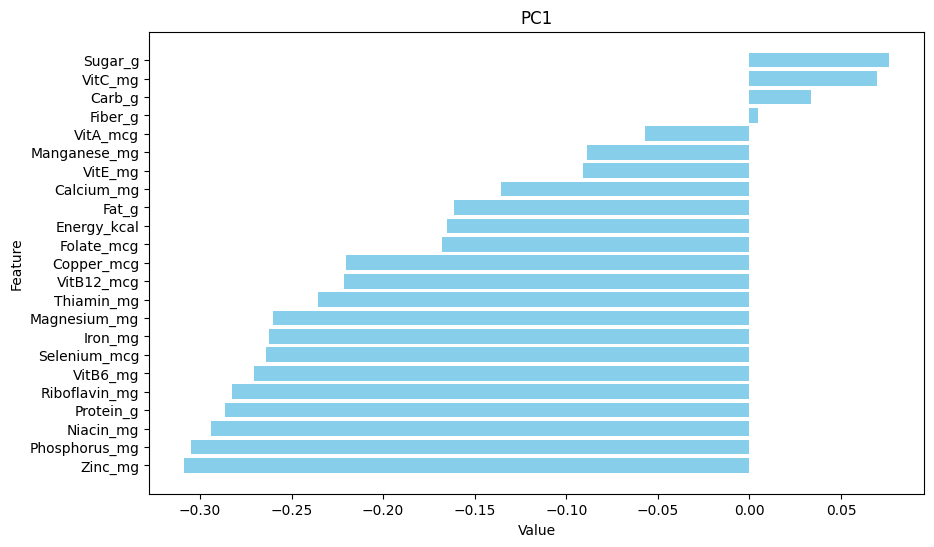

In [43]:
pca = CustomPCA(n_components=5)
pca.fit(standard_df)

eigenvectors = pca.get_components()
nutrient_names = numeric_reduced.columns
first = eigenvectors[:, 0]

component_df = pd.DataFrame({'Nutrient': nutrient_names, 'Contribution': second_component})
component_df['Abs_Contribution'] = component_df['Contribution']

component_df = component_df.sort_values(by='Abs_Contribution', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(component_df['Nutrient'], component_df['Contribution'], color='skyblue')
plt.xlabel("Value")
plt.ylabel("Feature")
plt.title("PC1")
plt.gca().invert_yaxis()
plt.show()


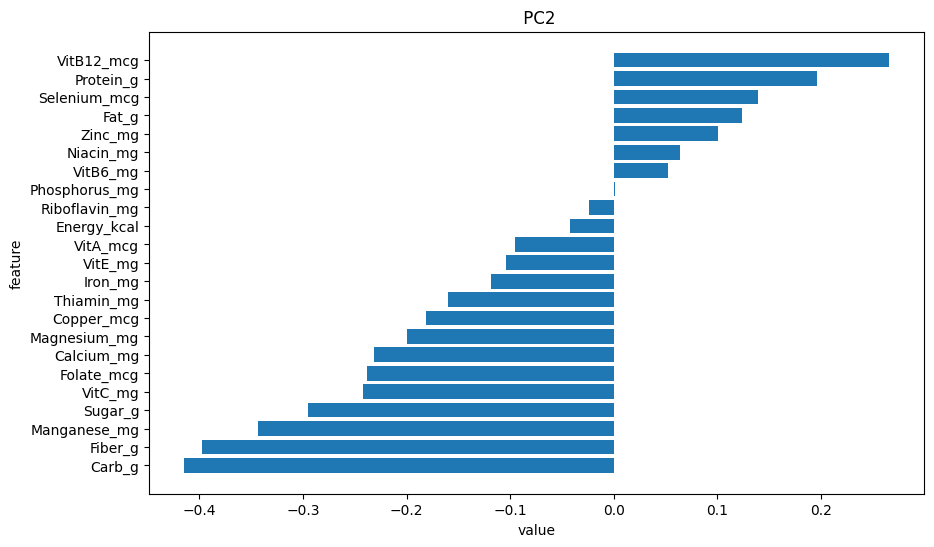

In [44]:
pca = CustomPCA( n_components=5 )
pca.fit(standard_df)

eigenvectors = pca.get_components()

nutrient_names = numeric_reduced.columns

second = eigenvectors[:, 1]

component_df = pd.DataFrame({'Nutrient': nutrient_names, 'Contribution': first_component})

component_df['Abs_Contribution'] = component_df['Contribution']
component_df = component_df.sort_values(by='Abs_Contribution', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(component_df['Nutrient'], component_df['Contribution'])
plt.xlabel("value")
plt.ylabel("feature")
plt.title(" PC2")
plt.gca().invert_yaxis()
plt.show()
#TODO

### What do these plots tell us about the first and second components?

<span style="color:skyblue;font-size: 20px;">YOUR ANSWER</span> \\

$PC1$ :

طول هر میله اندازه و جهت مشارکت به واریانس کل که توسط  $PC1$بدست میاید را نشان میدهد.

ویژگی‌هایی که میله‌های آن‌ها از خط پایه دورتر (به طرف + یا -) باشد، به معنای مشارکت قوی در $PC1$ هستند.
مواد مغذی با مقادیر مثبت یا منفی بزرگ در $PC1$، تأثیر بیشتری در الگوهای اصلی واریانس داده دارند.
  در کل نمودار به درک اینکه کدام مواد مغذی در تعریف الگوها یا ویژگی‌های اصلی مشاهده  شده در داده‌ها نقش دارند کمک میکند.


$PC2$:

به طور مشابه، نمودار $PC2$ نشان می‌دهد که هر ویژگی چگونه در واریانسی که توسط $PC2$ تعیین شده، مشارکت دارد.
ویژگی‌ها نیز جهت و قدرت مشارکتشان در  $PC2$ را نشان می‌دهد.


ویژگی‌هایی که میله‌های آن‌ها از خط پایه در $PC2$ به طرف‌های دیگر (مثبت یا منفی) باشد، به معنی مشارکت قوی در واریانس متفاوت و مستقل از $PC1$ هستند.
مواد با مقادیر بزرگ در $PC2$، برای گرفتن الگوهای واریانسی که توسط $PC1$ توضیح داده نمی‌شود، اهمیت دارند.




### 2- Distributions (10)

We're now curious about the relationship between PCAs and the food groups. To better understand this, select the top 500 samples with the highest PCA1 values and plot their food group distribution. Essentially, we're seeking to identify which food groups are more likely to be associated with high PCA1 values. No need for normalization; simply plotting the counts will suffice.

Afterward, plot the distribution of PCA1 for each food group. We're interested in understanding the PCA1 values for each food group.

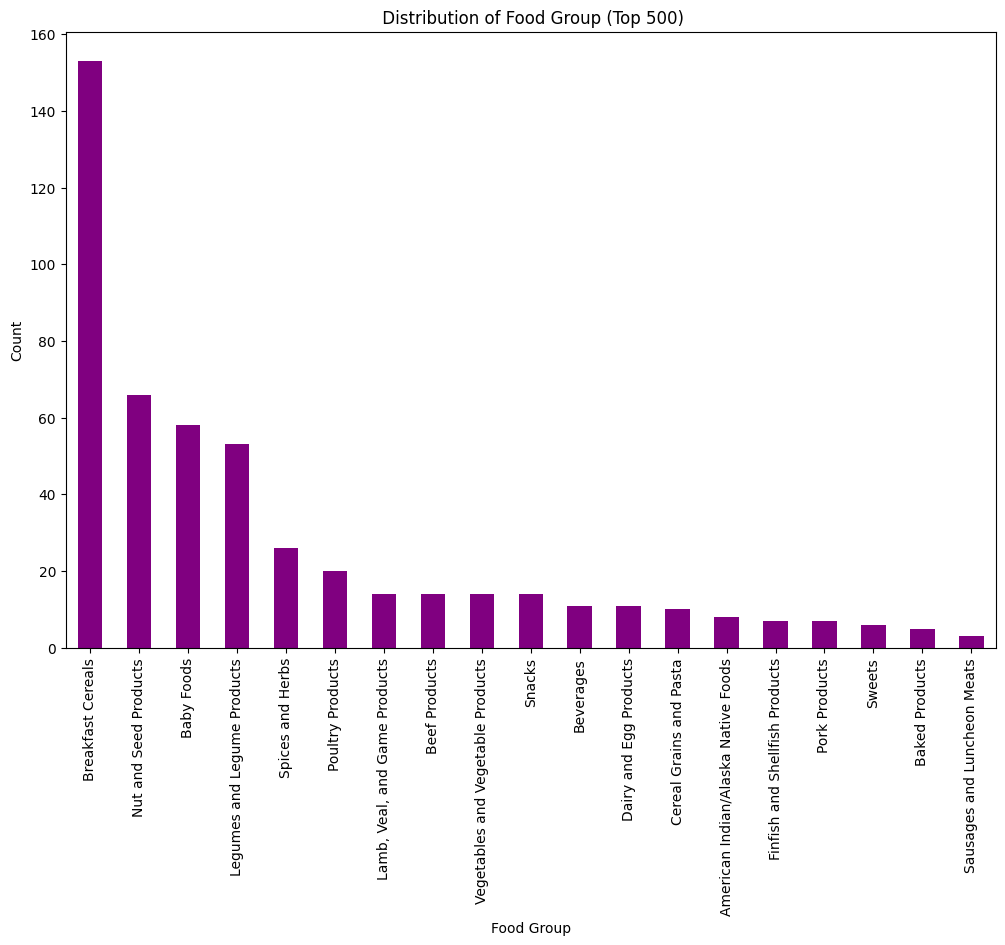

In [24]:
top_500_samples = new_df.nlargest(500, 'c1')

plt.figure(figsize=(12, 8))
top_500_samples['FoodGroup'].value_counts().plot(kind='bar', color='purple')
plt.xlabel('Food Group')
plt.ylabel('Count')
plt.title(' Distribution of Food Group (Top 500)')
plt.xticks(rotation=90)
plt.show()


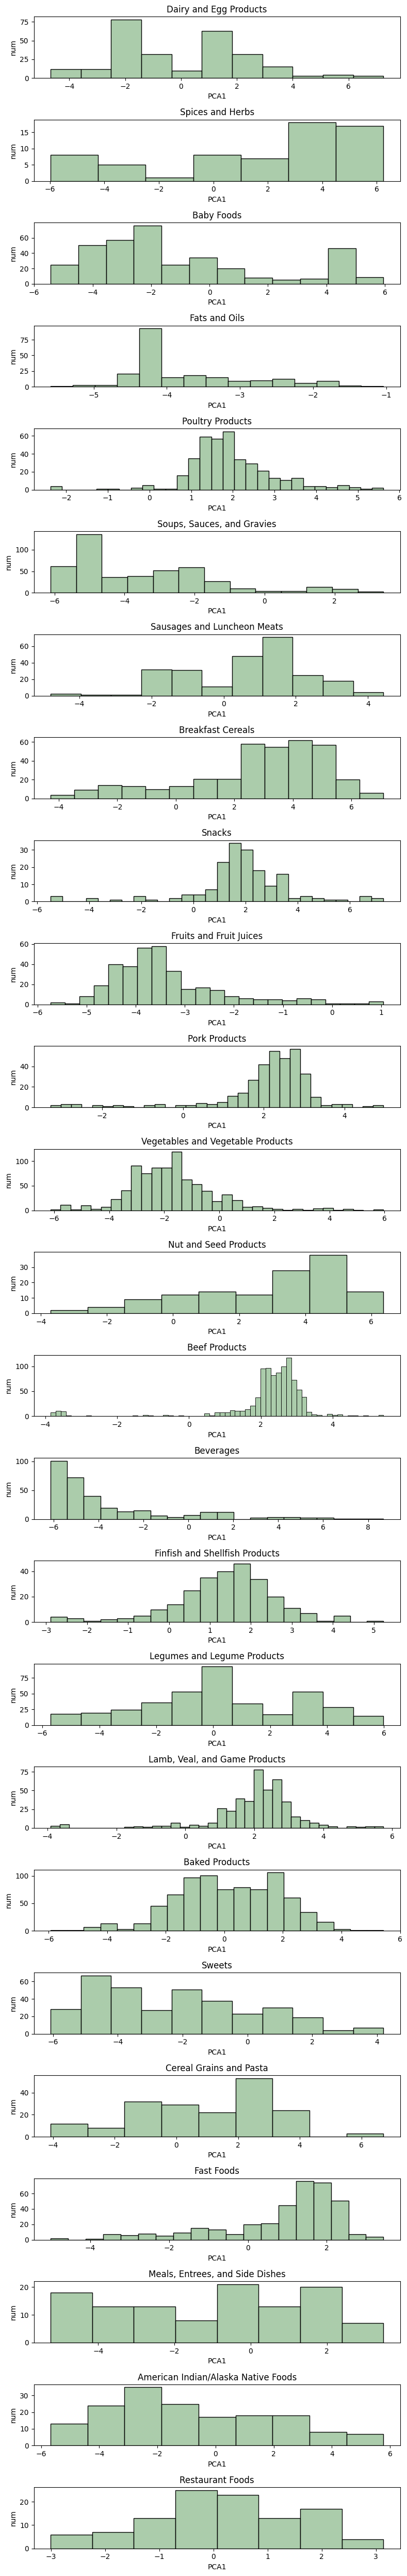

In [25]:
food_groups = new_df['FoodGroup'].unique()

fig, axes = plt.subplots(nrows=len(food_groups), figsize=(8, 2 * len(food_groups)))

for i, food_group in enumerate(food_groups):
    sns.histplot(new_df[new_df['FoodGroup'] == food_group]['c1'], ax=axes[i], color = '#8FBC8F')
    axes[i].set_xlabel('PCA1')
    axes[i].set_ylabel('num')
    axes[i].set_title(food_group)

plt.tight_layout()
plt.show()


Do the same for pca2.

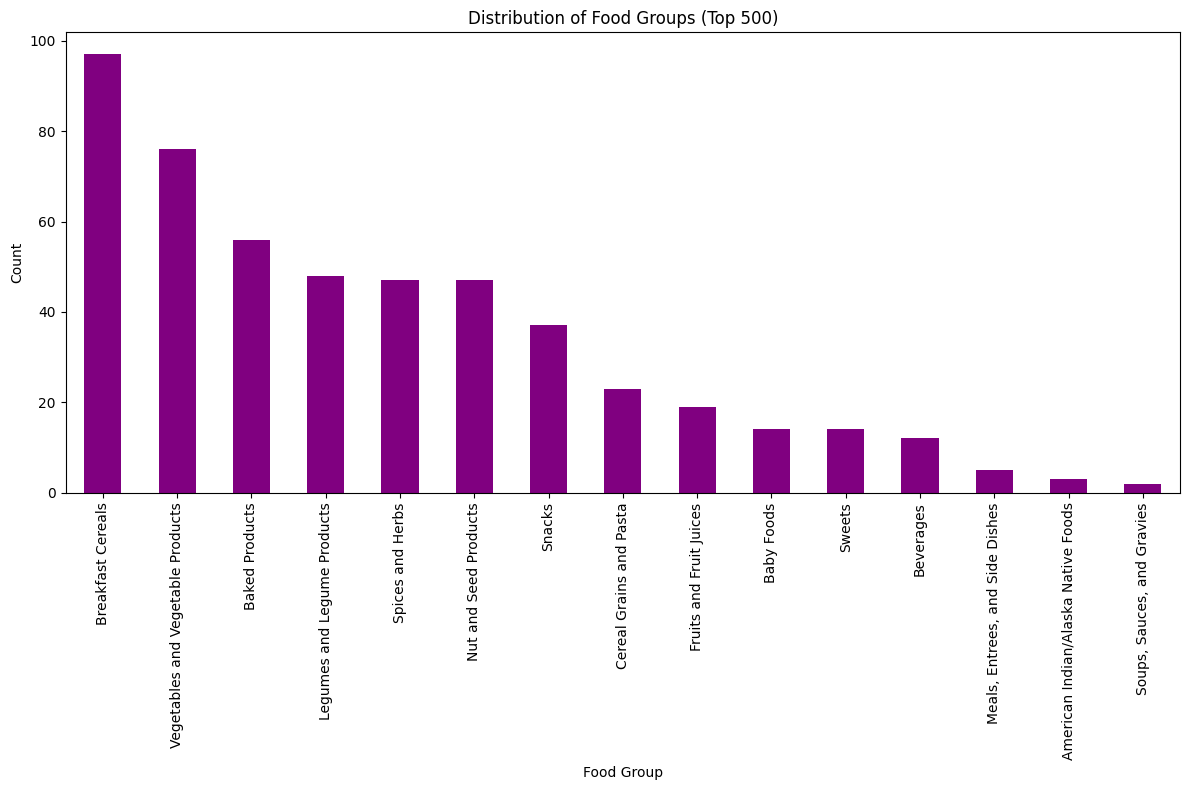

In [26]:
top_500_samples_c2 = new_df.nlargest(500, 'c2')

plt.figure(figsize=(12, 8))
top_500_samples_c2['FoodGroup'].value_counts().plot(kind='bar', color='purple')
plt.xlabel('Food Group')
plt.ylabel('Count')
plt.title('Distribution of Food Groups (Top 500)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


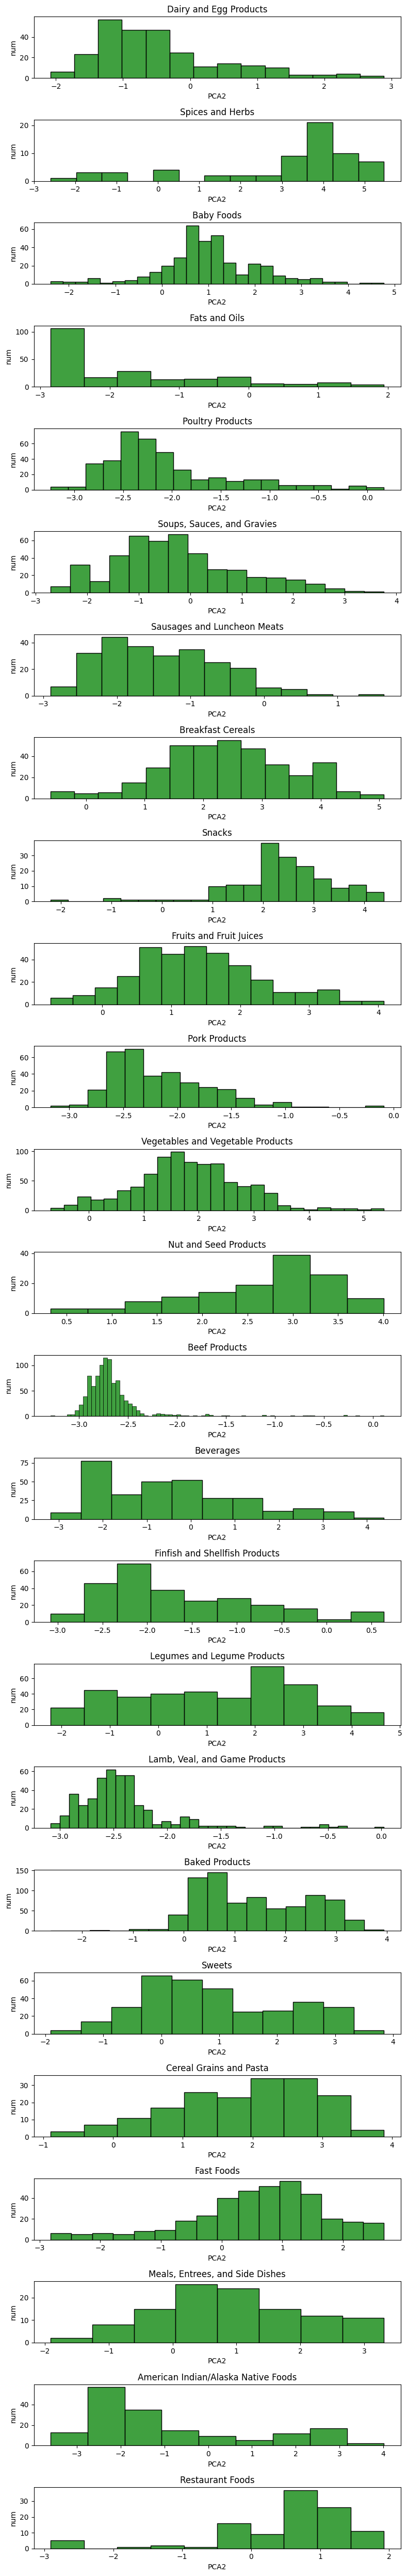

In [27]:
fig, axes = plt.subplots(nrows=len(food_groups), figsize=(8, 2 * len(food_groups)))

for i, food_group in enumerate(food_groups):
    sns.histplot(new_df[new_df['FoodGroup'] == food_group]['c2'], ax=axes[i], color='green')
    axes[i].set_xlabel('PCA2')
    axes[i].set_ylabel('num')
    axes[i].set_title(food_group)

plt.tight_layout()
plt.show()


### 3- Final result (5)

Lastly, plot the pca1 and pca2 for ```Beverages``` and ```Breakfast Cereals``` in ```FoodGroup```.


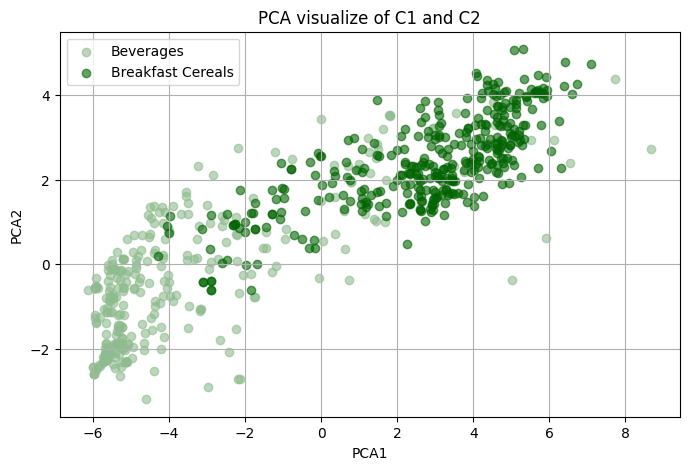

In [28]:
beverages_df = new_df[new_df['FoodGroup'] == 'Beverages']
cereals_df = new_df[new_df['FoodGroup'] == 'Breakfast Cereals']

plt.figure(figsize=(8, 5))

plt.scatter(beverages_df['c1'], beverages_df['c2'], color='#8FBC8F', label='Beverages', alpha=0.6)

plt.scatter(cereals_df['c1'], cereals_df['c2'], color='#006400', label='Breakfast Cereals', alpha=0.6)

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA visualize of C1 and C2')
plt.legend()
plt.grid(True)
plt.show()


### What can we learn from the plots in the last subsection (distributions)? (2.5)

<span style="color:skyblue;font-size: 20px;">Your Answer</span> \\
نقاط مربوط به نوشیدنی‌ها و غلات صبحانه در نمودار به وضوح از هم جدا نشده اند، این نشان‌دهنده این است که این دو گروه غذایی دارای ویژگی های تغذیه‌ای مشابهی هستند.
همچنین نمودار نوشیدنی ها پراکندگی بیشتری است که نشان دهنده تنوع ویژگی‌های تغذیه‌ای در این گروه است.


### How do the last plot and the distribution of PCA1 in each food group relate to each other? (2.5)

<span style="color:skyblue;font-size: 20px;">Your answer</span> \\
این دو نمودار پراکندگی دو گروه غدایی برحسب مولفه اول و دوم را تایید میکنند.برای مثال پراکندگی غلات صبحانه برحسب مولفه اول بیشتر است \\
همچنین نمودارهای توزیع $PCA1$ به ما نشان می‌دهند که هر گروه غذایی به چه میزان در امتداد محور $PCA1$ پراکنده شده است، در حالی که نمودار دو بعدی $PCA1$ و $PCA2$ می‌تواند نشان دهد که آیا این پراکندگی‌ها منجر به تفکیک واضح بین گروه‌ها می‌شود یا خیر. اگر گروه‌های غذایی در نمودار دو بعدی به خوبی جدا شده باشند، این نشان‌دهنده قدرت تفکیک $PCA$ در جداسازی گروه‌های غذایی مختلف است که در این مثال در فضایی دو بعدی خوب تفکیک نشده اند.

